# Введение

---

**В этой тетради мы**

* Рассмотрим задачу предсказания дохода пользователй;
* Продолжим знакомство с основными библиотеками для работы с данными: Pandas, Matplotlib и Scikit-learn;
* Научимся обрабатывать категориальные признаки;
* Обучим модели решающих деревьев;
* Научимся считать важные метрики задачи классификации.

---



# Предсказание   дохода

Не секрет, что таргетированные предложения успешно используются для привлечения новых клиентов, а также продвижения различных предложений. Доход - один из наиболее важных для банка признаков при формировании портрета клиента для таргетного маркетинга. При этом, на самом деле, банку важна не аккуратная точечная оценка дохода, а оценка попадания дохода в некоторый интервал. 

Идеальный вариант - это разбиение некоторого целевого интервала на несколько групп. Однако это приведет к решению многоклассовой задачи. Мы рассмотрим более простой вариант: предсказание бинарного дохода клиентов по социально-демографическим признакам (возраст, вид занятости и т.д.).


**Бизнес-постановка задачи**

Банк по анкетным данным оценивает категорию клиента. В нашем случае имеется две группы клиентов: которые зарабатывают больше 50000$ в год и меньше.

Применение модели:
* Научившись  предсказывать доход клиента, банк получает возможность более качественно предлагать свои услуги для разных групп пользователей. 

<img src="https://veralline.com/uploads/images/comparison/2019/06/12/ebe9161e14.jpg" alt="Drawing" style="width: 50px;" width="480"/>



**Постановка задачи анализа данных**

Целью данной задачи является построение модели **классификации пользователей**: на вход модель будет принимать данные о человеке, а на выходе она должна предсказывать бинарный уровень дохода человека (больше или меньше 50000$ за год).

## Обзор доступных данных

Мы будем использовать данные переписи населения США в 1994 году с платформы UCI https://archive.ics.uci.edu/ml/datasets/Adult.

В выборке 32561 наблюдение и 13 переменных, одна из которых - целевая (**income**). Выборка была разбита на две части для обучения и для тестирования модели размерами 24420 и 8141 соответственно. 

**Доступные признаки**

| Название признака | Значение | Число уникальных значений |
| :- | :- | :- |
| age | Возраст | 73|
| workclass | Тип работодателя | 9 |
| education | Уровень образования | 16 |
| marital-status | Семейное положение | 7 |
| occupation | Профессия | 15 | 
| relationship | Тип семейных отношений | 6 |
| race | Раса | 5 | 
| sex | Пол | 2 |
| capital-gain | Прирост капитала | 119 |
| capital-loss | Падение капитала | 92 |
| hours-per-week | Количество часов работы в неделю | 94 |
| native-country | Страна проживания | 42 |
| income | Уровень дохода | 2 | 


---


# План анализа данных

  1. Загрузить данные для обучения;
  2. Обработать данные перед обучением модели;
  3. Обучить модель на обучающей выборке;
  4. Провалидировать модель на тестовой выборке.



---


# 1. Загрузить данные для обучения

## 1.1. Загружаем библиотеки



<img src="https://storage.ning.com/topology/rest/1.0/file/get/1157930838?profile=RESIZE_710x" alt="Drawing" style="width: 50px;" width="620"/>


Для решения задачи нам понадобятся уже знакомые: 
* библиотека **pandas** для работы с табличными данными (Excel, CSV и др.);
* библиотека **matplotlib** для работы с двумерной и трехмерной графиков;
* библиотека **scikit-learn**, де-факто наиболее популярный, разносторонний, хорошо документированный и постоянно обогащающийся инструмент для построения моделей машинного обучения.




Чтобы загрузить любую библиотеку для работы, нужно написать

```
import имя_библиотеки as короткое_имя_библиотеки
``` 



In [1]:
# импортируем Pandas
import pandas as pd

# импортируем модуль pyplot из matplotlib
import matplotlib.pyplot as plt

#магическая команда, указывает, что графики нужно строить прямо в ноутбуке: 
%matplotlib inline 

Из библиотеки **scikit-learn** нам потребуется большое количество различных функций, поэтому будем их импортировать по мере необходимости.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/1550px-NumPy_logo.svg.png" alt="Drawing" style="width: 50px;" width="480"/>


На прошлых семинарах мы не использовали библиотеку **numpy**, но обычно без нее не обходится ни одно решение задачи машинного обучения. 

**Numpy** служит для обработки массивов чисел. В данную библиотеку входит огромное количество математических функций. Например, с помощью нее можно быстро создавать массивы, производить над ними быстрые вычисления, сортировать и многое другое.

In [2]:
import numpy as np

Некоторые библиотеки могут выводить на экран предупреждения, которые важно учитывать в "боевых" задачах. Но в учебной тетради мы укажем Python'у игнорировать их.

In [3]:
import warnings
warnings.filterwarnings("ignore")

## 1.2. Загрузим данные

Данные, которые мы будем использовать для решения задачи, состоят из двух частей: часть для обучения и часть для тестирования модели.

Для работы с данными в Colab их нужно загрузить с помощью команды `!wget`. Для того, чтобы игнорировать сообщения в процессе загрузки, используем магическую команду `%%capture` в первой строке.

In [4]:
#так нужно делать только в Google Colab
%%capture
!wget https://www.dropbox.com/s/1hfrcm09qtvoeoz/train.csv
!wget https://www.dropbox.com/s/jj7c8r0x57zda0a/test.csv

Наши данные в формате `csv` - comma separated values, то есть значения, разделенные запятой. Обычно data scientists работают с табличными данными, которые представлены именно в таком виде. Чтобы загрузить такие данные, будем использовать функцию **`pd.read_csv()`** из библиотеки `pandas`.  В функцию передаем один **атрибут**: название файла с данными в виде таблицы.

In [5]:
training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Проверим, что данные загрузились правильно: посмотрим, что находится в начале нашего файла с помощью метода `head()`.

In [6]:
training_data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,49,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40,United-States,0
1,27,NaN,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,45,United-States,0
2,44,NaN,11th,Married-civ-spouse,Other-service,Husband,Black,Male,0.0,0.0,60,United-States,0
3,59,Private,Bachelors,Separated,Adm-clerical,Unmarried,White,Male,0.0,0.0,60,United-States,0
4,54,Private,Bachelors,Divorced,Sales,Not-in-family,White,Female,0.0,1408.0,38,United-States,0


Проверим размерности наших файлов:

In [7]:
training_data.shape, test_data.shape

((24420, 13), (8141, 13))

**Работаем с целевой переменной**

Целевой переменной данной задачи является переменная **income**, обозначающая бинарный уровень дохода человека: доход выше или ниже 50000$ в год. 

Для удобства сразу отделим целевую переменную от остальных признаков. Чтобы удалить признак из таблицы необходимо воспользоваться методом `drop()`.


In [8]:
target_name = 'income'

In [9]:
training_target = training_data[target_name]
test_target = test_data[target_name]

training_points = training_data.drop(columns=[target_name])
test_points = test_data.drop(columns=[target_name])

**Упражнение.** Проанализируем наши данные с точки зрения сбалансированности задачи. Подсчитаем соотношения между людьми, которые имеют доход больше или меньше 50000$. Для этого воспользуемся методом `value_counts()` и сразу укажем параметр ` normalize=True`, чтобы посчитать не абсолютные значения, а пропорции.

*Подсказка: замените #YOUR_CODE_HERE на правильный код.*

In [10]:
training_target.value_counts(normalize=True)

0    0.757821
1    0.242179
Name: income, dtype: float64

Таким образом, имеем задачу **несбалансированной бинарной классификации**. 

## 1.3. Посмотрим общую статистику по числовым данным

В этот раз мы не будем останавливаться на подробном исследовании данных, а проанализируем их несколькими быстрыми способами. 

В первую очередь, посмотрим на статистики загруженной выборки. Для этого вызовем метод `describe()` для наших данных. 

Для удобства отображения мы транспонируем результат: меняем местами столбцы и строки.

*Замечание:* метод `describe()` выводит статистики только для числовых переменных.


In [11]:
training_points.describe().T

,count,mean,std,min,25%,50%,75%,max
age,24420.0,38.598116,13.638458,17.0,28.0,37.0,48.0,90.0
capital-gain,23705.0,1051.724067,7199.945441,0.0,0.0,0.0,0.0,99999.0
capital-loss,23936.0,88.409592,404.466154,0.0,0.0,0.0,0.0,4356.0
hours-per-week,24420.0,40.386568,12.299621,1.0,40.0,40.0,45.0,99.0



Обратим внимание на общие статистики показателей в данных:
* **count** -- количество значений, которые не являются пропущенными (`NaN`);
* **mean**, **std** -- среднее и разброс данных в соответствующем поле;
* остальные статистики -- минимальное и максимальное значения, и квантили.

**Упражнение.** Посмотрите на гистограммы призаков в таблице `training_points` с помощью метода `hist()`, установите размер картинки `figsize=(12,8)`. 

*Подсказка: замените #YOUR_CODE_HERE на правильный код.*

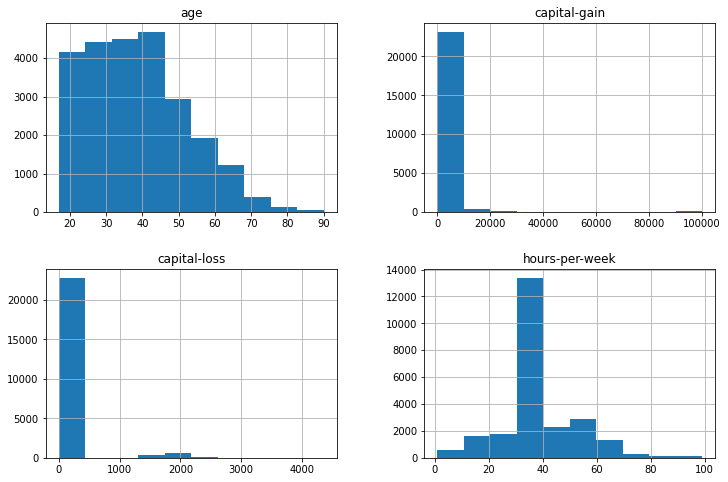

In [12]:
training_points.hist(figsize=(12,8));

Что мы можем увидеть из двух результатов?
* Числовых переменных в исходных данных только 4;
* Возраст пользователя варьируется в диапазоне от 17 до 90 лет и в среднем составляет 39 лет;
* Видим пропуски в признаках capital-gain и capital-loss (значение count меньше размера данных). По гистограмме можно заметить, что большое количество значений в этих признаках - это просто нули;

# 2. Обработать данные перед обучением модели

## 2.1. Проверяем данные на наличие пропусков и типов переменных

**Упражнение.** Начнем с проверки общей информации о данных. Для того чтобы это сделать, нужно вызвать у переменной метод `info()`.

*Подсказка: замените #YOUR_CODE_HERE на правильный код.*

In [13]:
training_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24420 entries, 0 to 24419
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             24420 non-null  int64  
 1   workclass       23223 non-null  object 
 2   education       23443 non-null  object 
 3   marital-status  24420 non-null  object 
 4   occupation      24420 non-null  object 
 5   relationship    24420 non-null  object 
 6   race            24420 non-null  object 
 7   sex             24420 non-null  object 
 8   capital-gain    23705 non-null  float64
 9   capital-loss    23936 non-null  float64
 10  hours-per-week  24420 non-null  int64  
 11  native-country  24420 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 2.2+ MB


Типы в наших данных:
* 8 признаков типа **object** - обычно это строковые значения;
* 3 признака типа **int64** - целочисленные значения;
* 2 признака типа **float64** - числа с плавающей запятой. 

Кроме этого, мы видим, что признаки *workclass, education, capital-gain и capital-loss* имеют пропуски в данных.

## 2.2 Обработка пропусков в данных

Далеко не все алгоритмы умеют работать с пропусками в данных. Кроме этого, удачно заполнив пропуски, мы сможем лучше восстановить распределение данных, а значит лучше построить моделей. 

Самые популярные методы для обработки пропусков:
- Удаление значений с пропусками (не желательно при большом количестве пропусков, потому что теряются данные);
- Заполнение средним/медианным значением;
- Заполненние самым частым значением;
- Заполнение случайным значением.

**Важно:** тестовую выборку мы всегда обрабатываем также, как и обучающую выборку. 

Ранее мы заметили, что самые частые значения в признаках **capital-loss** и **capital-gain** являются 0, поэтому для этих признаков мы не будем придумывать что-то более сложное и заполним пропуски нулями. Для этого используем метод `fillna()` с параметром 0. 

In [14]:
training_points['capital-loss'] = training_points['capital-loss'].fillna(0)
training_points['capital-gain'] = training_points['capital-gain'].fillna(0)

Сделаем то же самое для тестовой выборки:

In [15]:
test_points['capital-loss'] = test_points['capital-loss'].fillna(0)
test_points['capital-gain'] = test_points['capital-gain'].fillna(0)

*Напоминание*:
* бинарные признаки - это признаки, которые могут принимать только два значения, например, пол.
* категориальные признаки - это такие признаки, которые определяют факт принадлежности объекта к некоторой категории. Например, уровень образования у человека, цвет у машины, семейство у животных и т.д.
* количественные признаки - это признаки, которые не являются бинарными или категориальными :)


Признаки **workclass** и **education** являются категориальными признаками, поэтому методы заполнения средними или медианными значениями в данном случае просто не работают. Для простоты снова воспользуемся заполнением наиболее частым значением. Для этого сначала определим их в наших признаках, использовав комбинацию методов `value_counts()` и `head()`.

In [16]:
training_points['workclass'].value_counts(True).head()

Private             0.696766
Self-emp-not-inc    0.077595
Local-gov           0.065323
?                   0.055247
State-gov           0.040348
Name: workclass, dtype: float64

In [17]:
training_points['education'].value_counts(True).head()

HS-grad         0.322484
Some-college    0.223137
Bachelors       0.165550
Masters         0.052510
Assoc-voc       0.042785
Name: education, dtype: float64

Наиболее частое значение признака **workclass** - Private, признака **education** - HS-grad. 

Теперь явно заполним пропуски:

In [18]:
training_points['workclass'] = training_points['workclass'].fillna('Private')
training_points['education'] = training_points['education'].fillna('HS-grad')

Сделаем то же самое для тестовой выборки:

In [19]:
test_points['workclass'] = test_points['workclass'].fillna('Private')
test_points['education'] = test_points['education'].fillna('HS-grad')

*Замечание:* для категориальных признаков пропущенные значения также можно заполнить, создав новую специальную категорию для них. Обратите внимание на 4-ое значение наиболее частой категории в признаке **workclass**. 

## 2.3 Предобработка категориальных переменных

В данных 8 столбцов являются категориальными признаками. При чём в нашей задаче эти признаки **текстовые**. Машине сложно обрабатывать текстовые признаки, поэтому нам необходимо закодировать их, то есть преобразовать в числовые. 

Для начала необходимо выделить категорильные признаки:

In [20]:
categorical_features = ['workclass', 'education', 'marital-status', 
                        'occupation', 'relationship', 'race', 'sex', 
                        'native-country']

non_categorical_features = ['age', 'capital-gain', 'capital-loss', 
                            'hours-per-week']

Посмотрим на столбцы категориальных переменных:

In [21]:
training_points[categorical_features].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
2,Private,11th,Married-civ-spouse,Other-service,Husband,Black,Male,United-States
3,Private,Bachelors,Separated,Adm-clerical,Unmarried,White,Male,United-States
4,Private,Bachelors,Divorced,Sales,Not-in-family,White,Female,United-States


Мы рассмотрим два популярных метода кодирования категориальных признаков:
* Label Encoding, которому соответствует класс `LabelEncoder()` из библиотеки **sklearn**
* One Hot Encoding, которому соответствует класс `OneHotEncoder()` из библиотеки **sklearn**

**Label Encoding**

Первый способ кодирования категориальных признаков заключается в том, чтобы просто присвоить каждой категории уникальный номер, и заменить значения признаков на соответствующие номера. При таком способе кодирования количество признаков не меняется.

Например, в колонке Numerical записан результат Label Encoding:

<a href="https://drive.google.com/uc?id=1G-FeQGfSRYMiWQCFBKj7x93IP8Hr_u_g
" target="_blank"><img src="https://drive.google.com/uc?id=1G-FeQGfSRYMiWQCFBKj7x93IP8Hr_u_g" 
alt="IMAGE ALT TEXT HERE" width="360" border="0" /></a>

Мы сделали следующее отображение:
* Human перевели в 1;
* Penguin перевели в 2; 
* Octopus перевели в 3;
* Alien перевели в 4.



Мы уже имели дело с таким способом кодирования переменных на первом и втором семинаре, но кодировали признаки не самостоятельно, а использовали подготовленные данные. 

**Дополнительная часть. Код для Label Encoding**

Импортируем метод из библиотеки **sklearn**:

In [22]:
from sklearn.preprocessing import LabelEncoder

Чтобы воспользоваться данным классом, необходимо сперва создать прототип кодировщика: 

In [23]:
label_encoder = LabelEncoder()

Так как нам нужно закодировать сразу список признаков, мы будем делать это в цикле. Рассматриваем каждый категориальный признак из списка `categorical_features` и далее:

1. Методу `fit_transform()` передаем в качестве аргумента признак **обучающей** выборки
2. Методу `transform()` передаем в качестве аргумента признак **тестовой** выборки

In [24]:
for feature in categorical_features:
    training_points[feature] = label_encoder.fit_transform(training_points[feature])
    test_points[feature] = label_encoder.transform(test_points[feature])

In [25]:
training_points.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,49,4,11,2,3,0,4,1,0.0,0.0,40,39
1,27,4,11,2,7,0,4,1,0.0,0.0,45,39
2,44,4,1,2,8,0,2,1,0.0,0.0,60,39
3,59,4,9,5,1,4,4,1,0.0,0.0,60,39
4,54,4,9,0,12,1,4,0,0.0,1408.0,38,39


Видим, что количество признаков не поменялось и вместо текстовых значений стоят числовые переменные.

**One Hot Encoding**

Проблема кодирования предыдущим способом в том, что, кодируя категории числами и оставляя их в одном столбце, мы неявно задаем порядок данных. Так в нашем примере Human < Penguin < Octopus < Alien. Хотя на самом деле такой связи нет!

Избавить от этой проблемы позволяет One Hot Encoding. В ходе него все категории признаков отображаются в расширенное представление. Его мы и будем использовать для обработки выборки. 

In [26]:
from sklearn.preprocessing import OneHotEncoder



<a href="https://drive.google.com/uc?id=1mBoRFNVQtcPdb31J8DaimQqywyfdI4a8
" target="_blank"><img src="https://drive.google.com/uc?id=1mBoRFNVQtcPdb31J8DaimQqywyfdI4a8" 
alt="IMAGE ALT TEXT HERE" width="800" border="0" /></a>

При таком подходе для каждого категориального признака появляется столько новых колонок, сколько есть возможных категорий (на картинке выше 4 новых переменных). При этом 1 стоит в том случае, если какая-то категория присутствует у выбранного объекта. 

Можно сразу отметить важный недостаток данного подхода: если категорий будет много у признака, то количество новых колонок может очень сильно вырасти. Это приведет к переполнению памяти или снижению скорости обучения алгоритма. В наших данных категорий не много.

Чтобы воспользоваться классом `OneHotEncoder()`, необходимо сперва создать прототип кодировщика:

In [27]:
onehot_encoder = OneHotEncoder()

Для данного класса можно передать сразу все переменные, которые содержат категориальные признаки:

1. Методу `fit_transform()` передаем в качестве аргумента признаки **обучающей** выборки
2. Методу `transform()` передаем в качестве аргумента признаки **тестовой** выборки
3. С помощью метода `get_feature_names()` получим список новых названий колонок

In [28]:
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
training_points_onehot = onehot_encoder.fit_transform(training_points[categorical_features]).toarray()

# применяем полученное преобразование к тестовой выборке, результат переводим в массив
test_points_onehot = onehot_encoder.transform(test_points[categorical_features]).toarray()

# запишем полученные названия новых колонок в отдельную переменную
columns = onehot_encoder.get_feature_names(categorical_features)
columns[:10]

array(['workclass_0', 'workclass_1', 'workclass_2', 'workclass_3',
       'workclass_4', 'workclass_5', 'workclass_6', 'workclass_7',
       'workclass_8', 'education_0'], dtype=object)

Поскольку объект train_onehot (и test_onehot) не являются объектами класса `DataFrame()`, с которым нам проще работать, то явно преобразуем их в этот тип. Для этого передадим значения в класс `DataFrame()` и зададим названия колонок с помощью переменной `columns`.

In [29]:
training_points_onehot = pd.DataFrame(training_points_onehot, columns=columns)
test_points_onehot = pd.DataFrame(test_points_onehot, columns=columns)

И наконец, запишем в новую переменную полученный результат, удалив все незакодированные категориальные признаки из новой таблицы. 

In [30]:
# соединяем новую табличку с исходной
training_points_new = pd.concat([training_points, training_points_onehot], axis=1)
test_points_new = pd.concat([test_points, test_points_onehot], axis=1)

# удаляем старые категориальные признаки
training_points_new = training_points_new.drop(columns=categorical_features)
test_points_new = test_points_new.drop(columns=categorical_features)

In [31]:
training_points_new.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,marital-status_0,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,occupation_0,occupation_1,occupation_2,occupation_3,...,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
0,49,0.0,0.0,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,27,0.0,0.0,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,44,0.0,0.0,60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,59,0.0,0.0,60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,54,0.0,1408.0,38,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 3. Обучить модель на обучащей выборке

## 3.1 Выбираем метод обучения классификатора

Для обучения классификатора воспользуемся самым популярным алгоритмом машинного обучения - градиентным бустингом над решающими деревьями из библиотеки **xgboost** или как его чаще называют просто xgboost.

Градиентный бустинг над решающими деревьями имеет ряд преимуществ против других алгоритмов: 
* подходит сразу и для классификации, и для регрессии, и для задачи ранжирования;
* имеет высокую обобщающую способность;
* сложно допустить переобучение.

А основное достоинство реализации данного алгоритма в библиотеке **xgboost** - высокая вычислительная эффективность. 

Таким образом, способность хорошо решить огромное количество задач, сделала этот алгоритм самым популярным в области Machine Learning.

In [32]:
from xgboost import XGBClassifier

Создаем прототип класса модели:

In [33]:
boosting_tree_model = XGBClassifier(n_estimators=500)
boosting_tree_model

XGBClassifier(n_estimators=500)

Наиболее важные гиперпараметры модели **XGBClassifier**:
* гиперпараметр **n_estimators** определяет, сколько деревьев использовать в модели
* гиперпараметр **max_depth** ограничивает максимальную глубину дерева

## 3.2 Обучить модель

Теперь, когда мы создали прототип модели, можем их обучить с помощью обучающей выборки.

**Упражнение.** Обучите модель, вызвав метод `fit()` и передав ему на вход два аргумента: таблицу входных признаков и столбец значений целевой переменной - `(training_points_new, training_target)`.

*Подсказка: замените YOUR_CODE_HERE на правильный код.*



In [34]:
boosting_tree_model.fit(training_points_new, training_target)

XGBClassifier(n_estimators=500)

# 4. Провалидировать модель на тестовой выборке

**Упражнение**. Получите прогноз модели на тестовых данных с помощью модели **xgboost**. Для этого используйте метод `predict()`, передав ему на вход тестовую таблицу входных признаков.

*Подсказка: замените YOUR_CODE_HERE на правильный код.*


In [35]:
prediction_boosting = boosting_tree_model.predict(test_points_new)

## 4.1 Точность предсказания

Посчитаем точность (**accuracy**) работы моделей. Напомним, что точность отражает, сколько в процентном соотношении от размера тестовой выборки модель угадала 1 и сколько угадала 0.

Функция для подсчета точности реализована в библиотеке **sklearn** и называется `accuracy_score()`.

In [36]:
from sklearn.metrics import accuracy_score

В функцию `accuracy_score()` необходимо передать два аргумента:
* истинные значения меток
* предсказания модели

**Упражнение.** Посчитайте `accuracy_score()` для полученных предсказаний. 

*Подсказка: замените YOUR_CODE_HERE на правильный код.*

In [37]:
accuracy_score(test_target, prediction_boosting)

0.8785161528067805

Сравним значения точности для наших моделей с точностью для константного классификатора, модели, которая всегда бы предсказывала больший класс, в нашем случае 0. Для этого можно в функцию `accuracy_score()` в качестве второго аргумента передать массив нулей такого же размера. Это делается с помощью функции `zeros_like()` из библиотеки **numpy**.

In [38]:
print('Accuracy Major Class: ', accuracy_score(test_target, np.zeros_like(test_target)).round(3))

Accuracy Major Class:  0.763


Мы получили, что алгоритм градиентного бустинга работает лучше, чем примитивный константный классификатор. Однако используя метрику **accuracy** мы не можем точно понять, где алгоритм ошибается чаще: при предсказании 0 класса или при предсказании 1 класса. У нас возникает потребность подробнее выяснить как респределены разного рода ошибок нашего алгоритма. Чем и мы займемся далее.

## 4.2 Таблица сопряженности модели классификаци

Другой способ оценивать качество работы классификатора - использовать таблицу сопряженности. 

**Таблица сопряжённости** (матрица неточности, или Confusion matrix) содержит сводные показатели качества работы классификатора. 
* **Строки** соответствуют **фактическим** классам тестового набора;
* **Cтолбцы** соответствуют **предсказанным** классом.

Таблица содержит четыре сводных показателя, каждый из которых отражает количество объектов в одной и четырех
категорий: 
* **Истинно позитивный** (*True positive*, **TP**) -- объект
класса `1` был верно помечен меткой `1`;
* **Ложно позитивный** (*False positive*, **FP**) -- объект
фактически принадлежит классу `0`, но помечен меткой `1`;
* **Истинно отрицательный** (*True negative*, **TN**) -- классификатор
верно определил, что объект класса `0` принадлежит классу `0`;
* **Ложно отрицательный** (*False negative*, **FN**) -- классификатор
пометил объект меткой `0`, однако на самом деле объект принадлежит классу `1`.

Замечание: ошибки False positive часто называют **ложной тревогой**, а False negative - **пропуском цели**. 

|                   |  Предсказано `0` |  Предсказано `1` |
|:-------------------|:------------------|:------------------|
|**Фактически** `0`  |       TN         |       FP         |
|**Фактически** `1`  |       FN         |       TP         | 

Импортируем функцию для построения таблицы сопряженности из библиотеки **sklearn**.

In [39]:
from sklearn.metrics import confusion_matrix

Посмотрим на таблицу сопряженности для градиентного бустинга. Для этого в функцию `confusion_matrix()` необходимо передать два аргумента:
* Истинные значения меток
* Предсказания модели

Далее для удобства мы запишем полученную матрицу в удобный табличный вид, воспользовавшись классом `DataFrame()` из библиотеки **pandas**. 

In [40]:
pd.DataFrame(confusion_matrix(test_target, prediction_boosting))

,0,1
0,5886,328
1,661,1266


## 4.3 Прогноз вероятности принадлежности к классу

Вместо прогноза меток классов модель может с помощью метода `predict_proba()` выдавать метки вероятности принадлежности к классам. Так как класса у нас 2, то матрица будет размером (количество объектов в тестовой выборке, 2).

In [41]:
pred_proba_boosting = boosting_tree_model.predict_proba(test_points_new)

Посмотри на первые значения данной матрицы:

In [42]:
pred_proba_boosting[:5]

array([[0.99160427, 0.00839571],
       [0.39992696, 0.60007304],
       [0.28652787, 0.7134721 ],
       [0.97641563, 0.02358435],
       [0.9852391 , 0.01476089]], dtype=float32)

Вероятность принадлежности ко второму классу - во втором столбце матрицы вероятностей.

In [43]:
pred_proba_boosting = pred_proba_boosting[:, 1]

Посмотрим на распределение предсказанной классификатором вероятности дефолта, метки `1`.

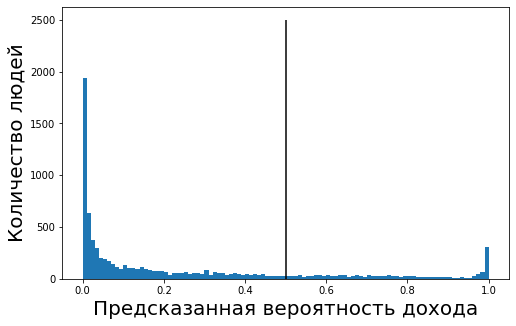

In [44]:
plt.figure(figsize=(8, 5))

plt.hist(pred_proba_boosting, bins=100)
plt.vlines(0.5, 0, 2500)

plt.xlabel('Предсказанная вероятность дохода', fontsize=20)
plt.ylabel('Количество людей', fontsize=20);

Поскольку количество нулевого класса больше, поэтому видим смещение распределения в левую сторону.

## 4.4 Выбор порога классификатора

На самом деле, при вызове метода `predict()` классификатор преобразует полученные вероятности в метки. По умолчанию для этого используется сравнение с порогом  0.5: 

> Eсли вероятность объекта меньше порога, то этот объект относится к классу 0, если больше - к классу 1

**За что отвечает порог классификатора?**

> Порог классификатора контролирует соотношение между количеством False positive и False negative.

* Если мы задаем слишком высокий порог классификатора, то он редко предсказывает 1, но часто 0, таким образом, увеличивается количество False negative и уменьшается количество False positive. 
* Если же порог низкий - мы часто предсказываем 1, а 0 реже, значит увеличивается количество False positive и уменьшается False negative.

Посмотрим на то, как влияет порог на матрицу сопряженности.  


In [45]:
def get_confusion_matrix(y_true, y_proba, threshold):
  # сравниваем вероятности с порогом
  y_pred = y_proba > threshold

  # преобразуем матрицу сопряженности в DataFrame для удобства 
  conf_matrix = pd.DataFrame(confusion_matrix(y_true, y_pred))

  return conf_matrix

In [46]:
get_confusion_matrix(test_target, pred_proba_boosting, 0.5)

,0,1
0,5886,328
1,661,1266


**Упражнение.** Попробуйте перебрать в цикле несколько порогов. Предложите критерий для выбора лучшего. 

*Подсказка: замените #YOUR_CODE_HERE на правильный код.*

In [47]:
def get_fp_and_fn(y_true, y_proba, threshold):
  # сравниваем вероятности с порогом
  y_pred = y_proba > threshold


  # получаем матрицу сопряженности
  conf_matrix = confusion_matrix(y_true, y_pred)

  # выберем ячейки, соответствующие false positive и false negative
  false_positive = conf_matrix[0, 1]
  false_negative = conf_matrix[1, 0]

  return false_positive, false_negative

In [48]:
def get_price_of_errors(price_one_fp, price_one_fn, number_of_thresholds=100):
  errors_price = []
  thresholds = np.linspace(0,1, number_of_thresholds)
  for th in thresholds:
    fp, fn = get_fp_and_fn(test_target, pred_proba_boosting, th)
    errors_price.append(price_one_fp*fp + price_one_fn*fn)
  return errors_price, thresholds

In [49]:
errors_price, thresholds = get_price_of_errors(price_one_fp=50, price_one_fn=50, number_of_thresholds=100)

In [50]:
print("Min errors price: {:} and corresponding threshold {:}".format(np.min(errors_price), thresholds[np.argmin(errors_price)]))

Min errors price: 49000 and corresponding threshold 0.4747474747474748


При увеличении порога количество False negative увеличилось, а количество False positive уменьшилось.

## 4.5 ROC кривая классификатора

Если хотят сравнить метрики на разных наборах данных, обычно работают не с абсолютными значениями True Positive и False Positive, а с их долями:

* Доля ложноположительных срабатываний $\text{FPR} = \frac{FP}{FP + TN}$;
* Доля истинно положительных срабатываний $\text{TPR} = \frac{TP}{TP + FN}$.

Заметим, что $FP + TN$ дает общее число объектов класса $0$, а $TP + FN$ - общее число объектов класса $1$. 

Одной из самых популярных метрик для задачи классификации является ROC кривая. ROC расшифровывается как *Receiver Operating Characteristic*. Эта кривая наглядно показывает зависимость доли истинно позитивных срабатываний (**TPR**) от доли ложно позитивных срабатываний (**FPR**) при изменении порога классификации.

Функция `roc_curve()` из **scikit-learn** позволяет получить координаты точек ROC кривой, а также значения порога `threshold`, при котором достигается соответствующие значения метрик **FPR** и **TPR**.

На вход функции `roc_curve()` необходимо передать два аргумента:
* истинные значения меток
* вероятности, предсказанные моделью

In [51]:
from sklearn.metrics import roc_curve

In [52]:
false_positive_rates, true_positive_rates, threshold = roc_curve(test_target, pred_proba_boosting)

Нарисуем ROC-кривую

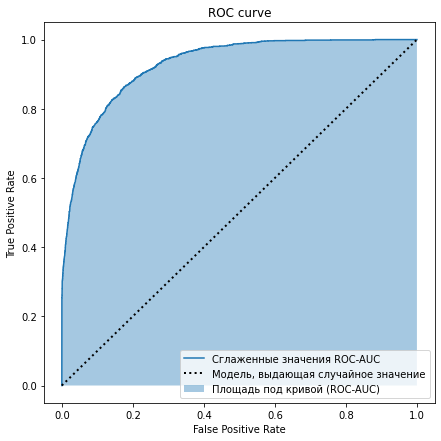

In [53]:
# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, 
         label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', 
         label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="pre", 
                 alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

Чем ближе в целом кривая ROC к левому верхнему углу, тем выше точность классификации.

Несмотря на наглядность, иногда требуется некоторое число, обобщающее весь
график. Для ROC кривой таким числом является "площадь под кривой" (**ROC-AUC**). 

В **sklearn** есть специальная функция `roc_auc_score()` для подсчёта
площади под ROC-кривой. 

In [54]:
from sklearn.metrics import roc_auc_score

Типичная шкала для **ROC-AUC** (часто все зависит от задачи):
* $0.90$ - $1.00$ отлично;
* $0.80$ - $0.90$ хорошо;
* $0.70$ - $0.80$ удовлетворительно;
* $0.60$ - $0.70$ плохо;
* $0.50$ - $0.60$ очень плохо;
* $0.00$ - $0.50$ классификатор перепутал метки.

In [55]:
print("ROC-AUC на тестовой выборке:", roc_auc_score(test_target, pred_proba_boosting).round(3)) 

ROC-AUC на тестовой выборке: 0.928


---
# Обзор результатов семинара

На этом семинаре мы:
* продолжили знакомство с основными библиотеками для машинного обучения Pandas, Numpy, Scikit-learn, Matplotlib;
* узнали, как можно заполнять пропуски в данных;
* рассмотрели два способа кодировать текстовые категориальные переменные Label Encoding, One Hot Encoding;
* обучили новую модель градиентного бустинга на решающих деревьях для предсказания бинарного дохода;
* рассмотрели различные метрики для решения задачи классификации: accuracy, confusion matrix, roc auc;
* узнали, что такое ROC-кривая и как ее нарисовать в Python;
* посмотрели, как выбор порога влияет на confusion matrix. 